In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy import stats

/home/asier/anaconda2/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:7: Ru

In [2]:
nombres = ['Results_CC_0.1.txt','Results_Ia_1.0_0.0.txt']

In [3]:
index_DTD = 0
index_SFR = 0

Prob_DTD = pd.DataFrame(columns=['Alfa','Delta','KS_Ia','AD_Ia','KS_CC','AD_CC'])
Prob_SFR = pd.DataFrame(columns=['Sigma','KS_Ia','AD_Ia','KS_CC','AD_CC'])

Dist_DTD_Ia = pd.DataFrame()
Dist_DTD_CC = pd.DataFrame()
Dist_SFR_Ia = pd.DataFrame()
Dist_SFR_CC = pd.DataFrame()

for name in nombres:

    df = pd.read_csv('../'+name+'', sep=" ", header=None)
    df.columns = ["SN", "p", "P"]
    R = df.shape[0]

    #-------------------------------------------------------------------------------------------------------------------

    # Distribuciones para las supernovas Ia

    P_Ia = np.zeros(R)
    k = 0
    for i in np.arange(len(df['SN'])):
        if df.at[i,'SN'] == 1:
            P_Ia[k] = float(df.at[i,'P'])
            k = k + 1

    P_Ia = P_Ia[P_Ia > 0]
    P_Ia = np.sort(P_Ia)

    N_Ia = np.arange(len(P_Ia))
    N_Ia = N_Ia + 0.5
    N_Ia = np.double(N_Ia)/(len(N_Ia))

    # Distribuciones para las supernovas CC

    P_CC = np.zeros(R)
    k = 0
    for i in np.arange(len(df['SN'])):
        if df.at[i,'SN'] == 2:
            P_CC[k] = float(df.at[i,'P'])
            k = k + 1

    P_CC = P_CC[P_CC > 0]
    P_CC = np.sort(P_CC)

    N_CC = np.arange(len(P_CC))
    N_CC = N_CC + 0.5
    N_CC = np.double(N_CC)/(len(N_CC))

    #-------------------------------------------------------------------------------------------------------------------

    # Test Kolmogorov Smirnov

    P_Ia_KS  = ks_2samp(P_Ia,  N_Ia)[1]
    P_Ia_KS = np.around(P_Ia_KS*100,2)

    P_CC_KS  = ks_2samp(P_CC,  N_CC)[1]
    P_CC_KS = np.around(P_CC_KS*100,2)

    # Test de Anderson Darling

    P_Ia_AD  = anderson_ksamp([P_Ia,  N_Ia])[2]
    P_Ia_AD  = np.absolute(np.around(P_Ia_AD *100,2))

    P_CC_AD  = anderson_ksamp([P_CC,  N_CC])[2]
    P_CC_AD  = np.absolute(np.around(P_CC_AD *100,2))

    #-------------------------------------------------------------------------------------------------------------------

    if name[8:10] == 'Ia' :
        alfa = float(name[11:14])
        delta = float(name[15:18])
        
        Dist_DTD_Ia.loc[:, ''+str(alfa)+'_'+str(delta)+''] = P_Ia
        Dist_DTD_CC.loc[:, ''+str(alfa)+'_'+str(delta)+''] = P_CC
        
        Prob_DTD.loc[index_DTD, 'Alfa'] = alfa
        Prob_DTD.loc[index_DTD, 'Delta'] = delta
        Prob_DTD.loc[index_DTD, 'KS_Ia'] = P_Ia_KS
        Prob_DTD.loc[index_DTD, 'AD_Ia'] = P_Ia_AD
        Prob_DTD.loc[index_DTD, 'KS_CC'] = P_CC_KS
        Prob_DTD.loc[index_DTD, 'AD_CC'] = P_CC_AD
        
        index_DTD = index_DTD + 1
    
    if name[8:10] == 'CC' :
        sigma = float(name[11:13])
        
        Dist_SFR_Ia.loc[:, ''+str(sigma)+''] = P_Ia
        Dist_SFR_CC.loc[:, ''+str(sigma)+''] = P_CC

        Prob_SFR.loc[index_SFR, 'Sigma'] = sigma
        Prob_SFR.loc[index_SFR, 'KS_Ia'] = P_Ia_KS
        Prob_SFR.loc[index_SFR, 'AD_Ia'] = P_Ia_AD
        Prob_SFR.loc[index_SFR, 'KS_CC'] = P_CC_KS
        Prob_SFR.loc[index_SFR, 'AD_CC'] = P_CC_AD
        
        index_SFR = index_SFR + 1

/home/asier/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


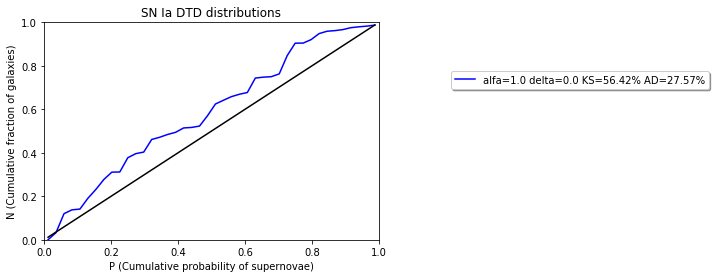

In [4]:
color = ['b','g','r','c','m','y']

for C in np.arange(Dist_DTD_Ia.shape[1]):
    
    q = float(Dist_DTD_Ia.columns[C][0:3])
    w = float(Dist_DTD_Ia.columns[C][4:7])
    e = Prob_DTD.at[C,'KS_Ia']
    r =Prob_DTD.at[C,'AD_Ia']
    
    plt.plot(N_Ia,Dist_DTD_Ia[Dist_DTD_Ia.columns[C]],color[C],label='alfa={} delta={} KS={}% AD={}%'.format(q,w,e,r))
    #plt.plot(N_Ia,Dist_DTD_Ia[Dist_DTD_Ia.columns[C]],''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia DTD distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

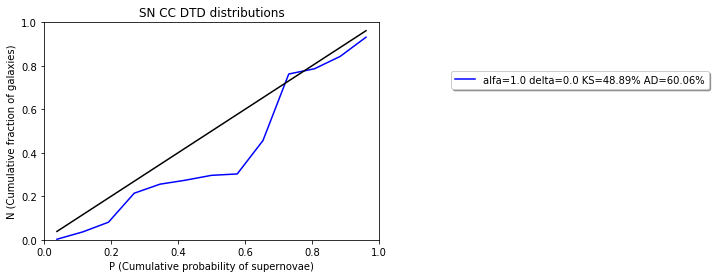

In [5]:
color = ['b','g','r','c','m','y']

for C in np.arange(Dist_DTD_CC.shape[1]):
    
    q = float(Dist_DTD_CC.columns[C][0:3])
    w = float(Dist_DTD_CC.columns[C][4:7])
    e = Prob_DTD.at[C,'KS_CC']
    r =Prob_DTD.at[C,'AD_CC']
    
    plt.plot(N_CC,Dist_DTD_CC[Dist_DTD_CC.columns[C]],color[C],label='alfa={} delta={} KS={}% AD={}%'.format(q,w,e,r))
    #plt.plot(N_CC,Dist_DTD_CC[Dist_DTD_CC.columns[C]],''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN CC DTD distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

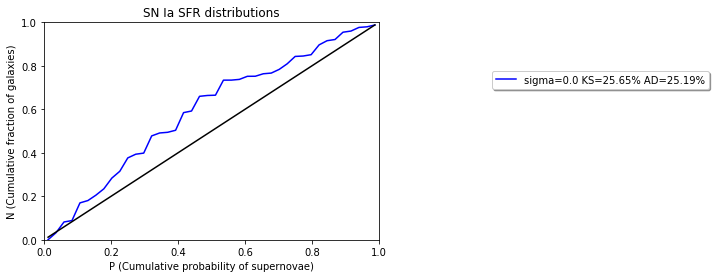

In [6]:
color = ['b','g','r','c','m','y']

for C in np.arange(Dist_SFR_Ia.shape[1]):
    
    q = float(Dist_SFR_Ia.columns[C][0:3])
    e = Prob_SFR.at[C,'KS_Ia']
    r =Prob_SFR.at[C,'AD_Ia']
    
    plt.plot(N_Ia,Dist_SFR_Ia[Dist_SFR_Ia.columns[C]],color[C],label='sigma={} KS={}% AD={}%'.format(q,e,r))
    #plt.plot(N_Ia,Dist_SFR_Ia[Dist_SFR_Ia.columns[C]],''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia SFR distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

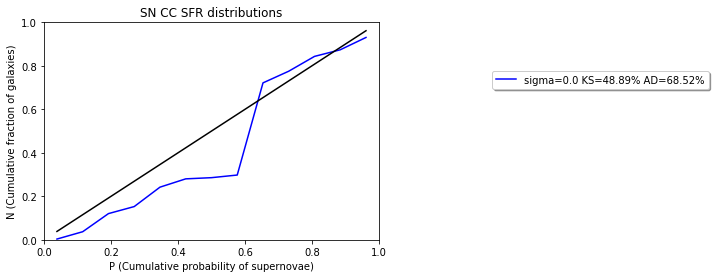

In [7]:
color = ['b','g','r','c','m','y']

for C in np.arange(Dist_SFR_CC.shape[1]):
    
    q = float(Dist_SFR_CC.columns[C][0:3])
    e = Prob_SFR.at[C,'KS_CC']
    r =Prob_SFR.at[C,'AD_CC']
    
    plt.plot(N_CC,Dist_SFR_CC[Dist_SFR_CC.columns[C]],color[C],label='sigma={} KS={}% AD={}%'.format(q,e,r))
    #plt.plot(N_CC,Dist_SFR_CC[Dist_SFR_CC.columns[C]],''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN CC SFR distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()